In [1]:
import pandas as pd

In [2]:
listings_df = pd.read_csv("listings.csv")
print(listings_df.shape)
listings_df.head()
listings_df.info()
listings_df.describe(include='all')

(31907, 85)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31907 entries, 0 to 31906
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31907 non-null  int64  
 1   listing_url                                   31907 non-null  object 
 2   scrape_id                                     31907 non-null  int64  
 3   last_searched                                 26192 non-null  object 
 4   last_scraped                                  31907 non-null  object 
 5   source                                        31907 non-null  object 
 6   name                                          31907 non-null  object 
 7   description                                   31313 non-null  object 
 8   neighborhood_overview                         14433 non-null  object 
 9   picture_url                                   319

,id,listing_url,scrape_id,last_searched,last_scraped,source,name,description,neighborhood_overview,picture_url,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
count,3.190700e+04,31907,3.190700e+04,26192,31907,31907,31907,31313,14433,31907,...,31907.000000,31907.000000,31907.000000,3.190700e+04,31907,31907.000000,31907,31907,31907,27692.000000
unique,NaN,31907,NaN,1,4,2,30744,28469,12893,31162,...,NaN,NaN,NaN,NaN,166,NaN,31,8,8,NaN
top,NaN,https://www.airbnb.com/rooms/603677011869258126,NaN,2025-06-12,2025-06-23,country scrape,The Cottage,Relax with the whole family at this peaceful p...,You'll find Generator Dublin in the hip Smithf...,https://a0.muscache.com/pictures/40dd8e63-9497...,...,NaN,NaN,NaN,NaN,North Inner City LEA-7,NaN,Dublin City Council,IE061,Dublin,NaN
freq,NaN,1,NaN,26192,12230,26192,19,113,36,15,...,NaN,NaN,NaN,NaN,1832,NaN,7048,9829,9829,NaN
mean,5.693874e+17,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.651111,1.404582,0.042279,7.917672e+06,NaN,154251.959382,NaN,NaN,NaN,1.518150
std,5.557529e+17,NaN,1.772293e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.851923,5.625129,0.529455,5.903511e+06,NaN,93845.277108,NaN,NaN,NaN,1.759258
min,1.153200e+04,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.310400e+06,NaN,15001.000000,NaN,NaN,NaN,0.010000
25%,2.772388e+07,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.360400e+06,NaN,65001.000000,NaN,NaN,NaN,0.330000
50%,6.445273e+17,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,1.315040e+07,NaN,155001.000000,NaN,NaN,NaN,0.930000
75%,1.120133e+18,NaN,2.025061e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,0.000000,1.326041e+07,NaN,265002.000000,NaN,NaN,NaN,2.040000


In [3]:
listings_df.isnull().sum().sort_values(ascending=False)

license                      31907
requires_license             31907
calendar_updated             31907
host_about                   19477
neighborhood_overview        17474
                             ...  
number_of_reviews_ly             0
estimated_occupancy_l365d        0
accommodates                     0
room_type                        0
id                               0
Length: 85, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Calculate percentage of missing values
missing_percent = (listings_df.isnull().sum() / len(listings_df)) * 100

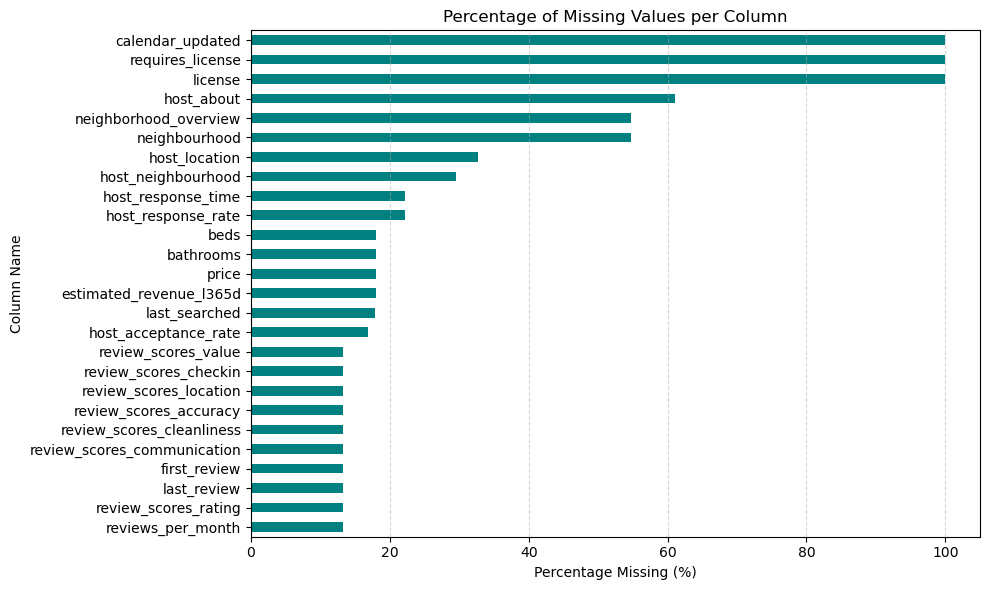

In [16]:
# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 10]

#Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='teal')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Percentage Missing (%)")
plt.ylabel("Column Name")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
county_df = pd.read_excel("Helmi_county_code.xlsx")

In [20]:
county_df

,Regional,County_Name
0,IE-CW,Carlow
1,IE-CN,Cavan
2,IE-CE,Clare
3,IE-CO,Cork
4,IE-DL,Donegal
5,IE-D,Dublin
6,IE-G,Galway
7,IE-KY,Kerry
8,IE-KE,Kildare
9,IE-KK,Kilkenny


In [21]:
# Extract county name from 'region_parent_name'
# Remove 'County Council', 'City Council', and 'City And County Council'
listings_df['County'] = listings_df['region_parent_name'].str.replace(r' (City And County|County|City) Council', '', regex=True).str.strip()

# Standardize case to match county name data
listings_df['County'] = listings_df['County'].str.title()
county_df['County_Name'] = county_df['County_Name'].str.title()

# Filter to Wild Atlantic Way counties
wild_atlantic_counties = ['Donegal', 'Leitrim', 'Sligo', 'Mayo', 'Galway', 'Clare', 'Limerick', 'Kerry', 'Cork']
df_waw = listings_df[listings_df['County'].isin(wild_atlantic_counties)].copy()

# Print results
print("Unique counties after cleaning:")
print(df_waw['County'].unique())

print("\nSample filtered listings from Wild Atlantic Way:")
print(df_waw[['region_parent_name', 'County']].head())

Unique counties after cleaning:
['Cork' 'Limerick' 'Galway' 'Leitrim' 'Mayo' 'Kerry' 'Sligo' 'Clare'
 'Donegal']

Sample filtered listings from Wild Atlantic Way:
                 region_parent_name    County
2               Cork County Council      Cork
4  Limerick City And County Council  Limerick
5             Galway County Council    Galway
6            Leitrim County Council   Leitrim
8               Mayo County Council      Mayo


In [33]:
df_waw['price'] = pd.to_numeric(df_waw['price'].replace(r'[\$,]', '', regex=True), errors='coerce')
df_waw = df_waw[df_waw['price'] <= 1000].copy()

avg_price = df_waw.groupby('County')['price'].mean().sort_values(ascending=False)
print("\nAverage Price per County:\n", avg_price)


Average Price per County:
 County
Kerry       176.283955
Leitrim     176.062092
Galway      175.827212
Clare       165.578177
Cork        158.409091
Donegal     154.709564
Mayo        153.241499
Sligo       146.213439
Limerick    144.464623
Name: price, dtype: float64


In [29]:
listings_count = df_waw['County'].value_counts()
print("\nListings per County:\n", listings_count)


Listings per County:
 County
Galway      2859
Kerry       2842
Cork        2442
Donegal     2269
Clare       1503
Mayo        1441
Sligo        506
Limerick     424
Leitrim      306
Name: count, dtype: int64


In [26]:
df_waw['reviews_per_month'] = pd.to_numeric(df_waw['reviews_per_month'], errors='coerce')

avg_reviews = df_waw.groupby('County')['reviews_per_month'].mean().sort_values(ascending=False)
print("\nAverage Reviews per Month per County:\n", avg_reviews)


Average Reviews per Month per County:
 County
Limerick    1.980615
Galway      1.907182
Cork        1.782747
Kerry       1.753051
Clare       1.671143
Sligo       1.643734
Mayo        1.408410
Donegal     1.360058
Leitrim     1.124496
Name: reviews_per_month, dtype: float64


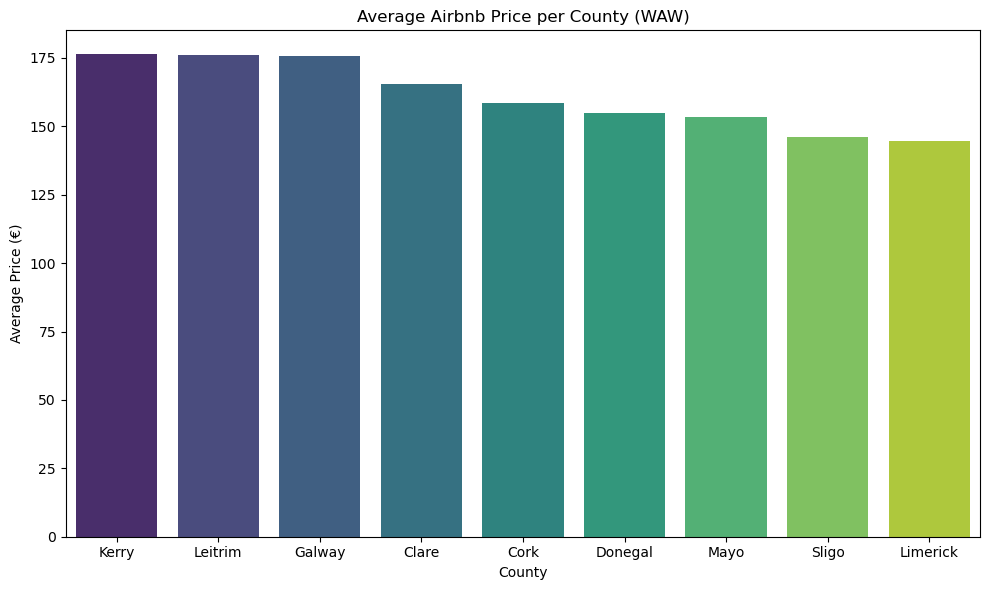

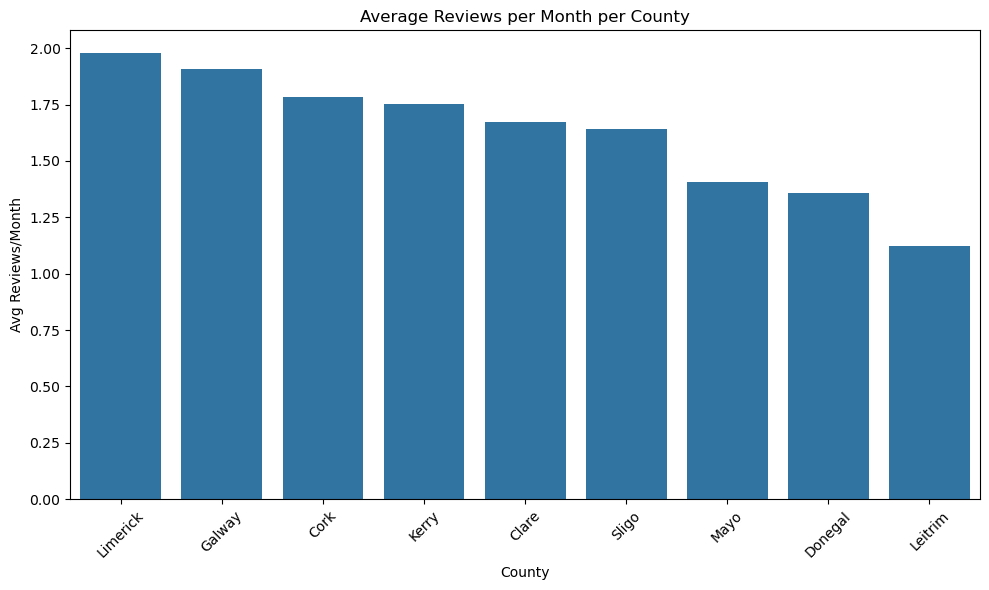

In [27]:
# Plot average price
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.index, y=avg_price.values,palette="viridis",hue = avg_price.index, legend=False)
plt.title('Average Airbnb Price per County (WAW)')
plt.ylabel('Average Price (€)')
plt.xlabel('County')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot reviews per month
plt.figure(figsize=(10,6))
sns.barplot(x=avg_reviews.index, y=avg_reviews.values)
plt.title('Average Reviews per Month per County')
plt.ylabel('Avg Reviews/Month')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#Top regions by number of listings
top_regions = df_waw['region_name'].value_counts().head(10)
print("\nTop 10 Regions by Listing Count:\n", top_regions)


Top 10 Regions by Listing Count:
 region_name
Kenmare LEA-6                1094
Ennistimon LEA-4              846
Conamara North LEA-4          806
Corca Dhuibhne LEA-3          754
Glenties LEA-6                696
Donegal LEA-6                 658
Galway City Central LEA-6     650
Bantry-West Cork LEA-4        616
Killarney LEA-7               556
Westport LEA-4                525
Name: count, dtype: int64


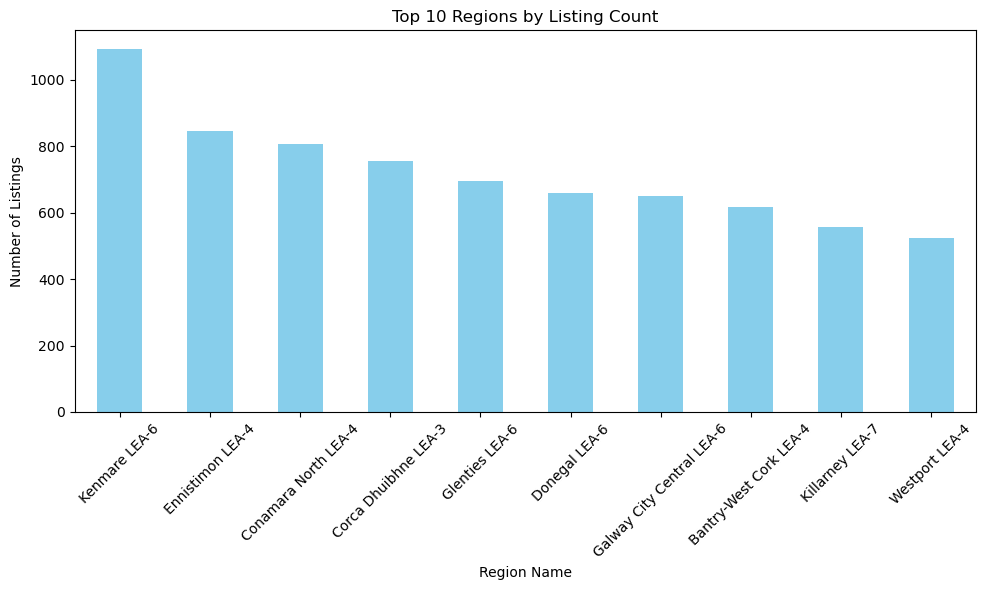

In [62]:
# Plot
plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions by Listing Count')
plt.xlabel('Region Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
property_counts = df_waw['property_type'].value_counts()
property_counts

property_type
Entire home                          4834
Private room in home                 1827
Entire rental unit                   1392
Entire cottage                       1274
Private room in bed and breakfast     708
                                     ... 
Religious building                      1
Private room in casa particular         1
Holiday park                            1
Private room in resort                  1
Shared room in guesthouse               1
Name: count, Length: 89, dtype: int64

In [64]:
rare_types = property_counts[property_counts < 30].index
rare_types

Index(['Tent', 'Dome', 'Shepherd’s hut', 'Castle', 'Private room in cabin',
       'Private room in castle', 'Yurt', 'Treehouse', 'Shared room in hostel',
       'Private room in hut', 'Private room in yurt',
       'Private room in holiday park', 'Room in aparthotel',
       'Shipping container', 'Private room in tent',
       'Private room in nature lodge', 'Boat', 'Bus',
       'Private room in tiny home', 'Campsite', 'Tipi', 'Earthen home',
       'Private room in earthen home', 'Private room in camper/rv',
       'Private room in barn', 'Room in hostel', 'Shared room in hotel',
       'Island', 'Casa particular', 'Private room in train',
       'Private room in villa', 'Train', 'Shared room in bed and breakfast',
       'Private room in serviced apartment', 'Private room in vacation home',
       'Shared room', 'Shared room in home', 'Private room in tipi',
       'Private room in loft', 'Room in serviced apartment',
       'Shared room in townhouse', 'Private room in shipping con

In [65]:
df_waw['property_type_grouped'] = df_waw['property_type'].replace(rare_types, 'Other')

In [66]:
# Save cleaned and merged datasets
df_waw.to_csv("C:/Users/helme/Documents/Thesis/waw_listings.csv", index=False)


In [67]:
df_waw_listings = pd.read_csv('C:/Users/helme/Documents/Thesis/waw_listings.csv')

In [68]:
df_waw_listings.head()

,id,listing_url,scrape_id,last_searched,last_scraped,source,name,description,neighborhood_overview,picture_url,...,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month,County,property_type_grouped
0,1141864011309312026,https://www.airbnb.com/rooms/1141864011309312026,20250612050720,2025-06-12,2025-06-22,country scrape,Spacious Double Room in Cloyne.R.6,Spacious Double Room Ensuite in the heart of C...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,0,1340402,Midleton LEA-7,45501,Cork County Council,IE053,South-West,0.08,Cork,Private room in home
1,767377133564836268,https://www.airbnb.com/rooms/767377133564836268,20250612050720,2025-06-12,2025-06-22,country scrape,1 BedRoom Apartment-Shanagolden,Enjoy easy access to everything from this perf...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,0,13120401,Adare-Rathkeale LEA-6,125002,Limerick City And County Council,IE051,Mid-West,NaN,Limerick,Entire condo
2,1391984412269438866,https://www.airbnb.com/rooms/1391984412269438866,20250612050720,2025-06-12,2025-06-22,country scrape,"Cherry Blossom Chalet, Galway","Newly custom built chalet in tranquil, country...","Rural location surrounded by lush, green field...",https://a0.muscache.com/pictures/hosting/Hosti...,...,0,1360401,Tuam LEA-7,65001,Galway County Council,IE042,West,7.38,Galway,Entire chalet
3,664621246748029547,https://www.airbnb.com/rooms/664621246748029547,20250612050720,2025-06-12,2025-06-22,country scrape,No 17 Mountain Dale,This end-terraced cottage is situated in the v...,"Bundoran is a coastal town in County Donegal, ...",https://a0.muscache.com/pictures/prohost-api/H...,...,0,13110400,Manorhamilton LEA-6,115001,Leitrim County Council,IE041,Border,NaN,Leitrim,Entire home
4,1070309044598564001,https://www.airbnb.com/rooms/1070309044598564001,20250612050720,2025-06-12,2025-06-22,country scrape,Swinford Country House,"Swinford Country House, a property with a gard...",Located in a stunning area close to Swinford t...,https://a0.muscache.com/pictures/hosting/Hosti...,...,0,13150405,Swinford LEA-4,155001,Mayo County Council,IE042,West,0.30,Mayo,Entire home


#  Most Common Property Type by County

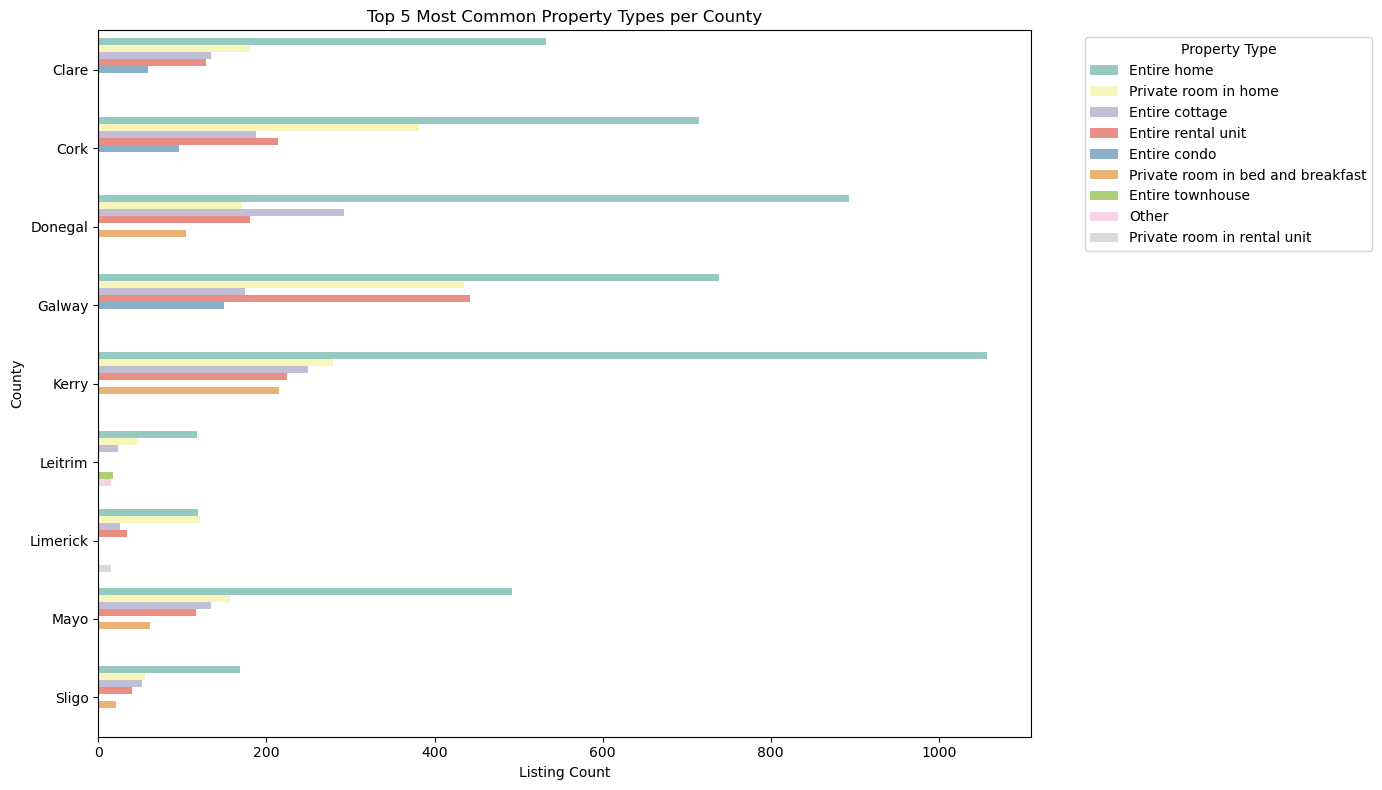

In [70]:
# Count property types per county
property_counts = df_waw_listings.groupby(['County', 'property_type_grouped']).size().reset_index(name='count')

# Get top property type per county
top_property = property_counts.sort_values(['County', 'count'], ascending=[True, False])
top4_per_county = (property_counts.sort_values(['County', 'count'], ascending=[True, False]).groupby('County').head(5))

plt.figure(figsize=(14, 8))
sns.barplot(data=top4_per_county, x='count', y='County', hue='property_type_grouped', palette='Set3')
plt.title("Top 5 Most Common Property Types per County")
plt.xlabel("Listing Count")
plt.ylabel("County")
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Room Type Distribution by County

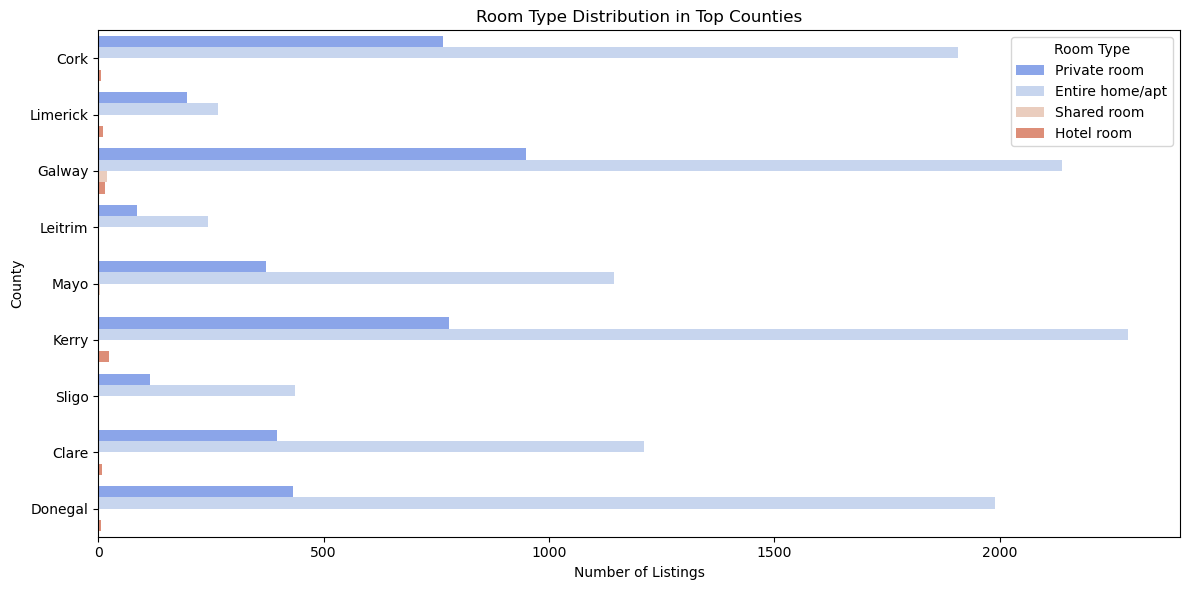

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_waw_listings, y='County', hue='room_type', palette='coolwarm')
plt.title("Room Type Distribution in Top Counties")
plt.xlabel("Number of Listings")
plt.ylabel("County")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()


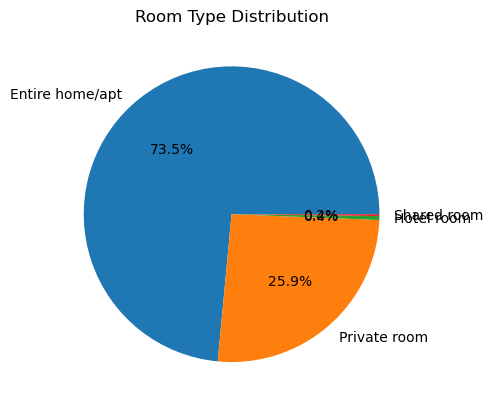

In [27]:
# Distribution of room types
if 'room_type' in df_waw_listings.columns:
    df_waw_listings['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Room Type Distribution')
    plt.ylabel("")
    plt.show()


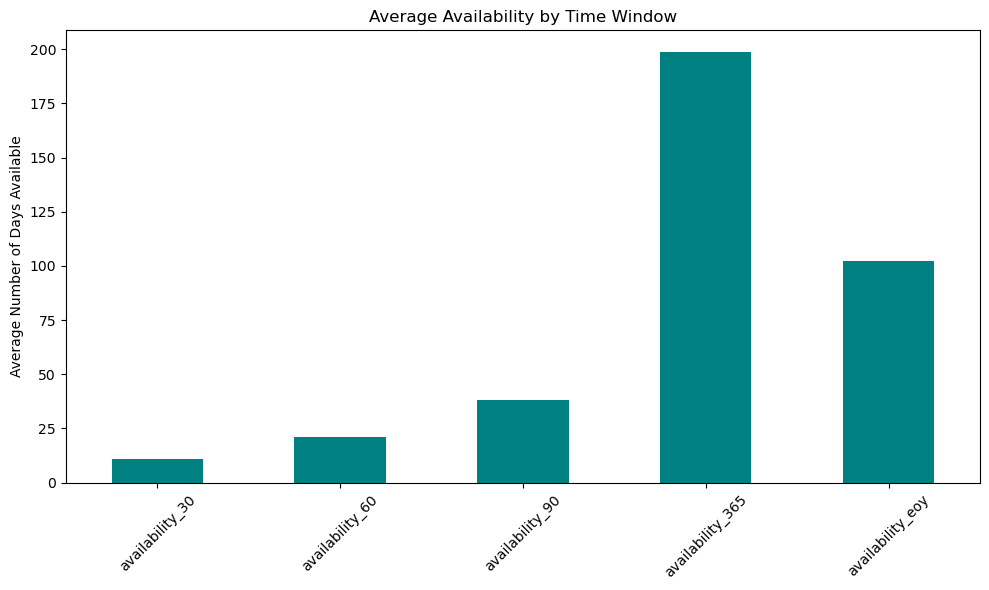

In [28]:
#Availability over the year
availability_cols = [col for col in df_waw_listings.columns if 'availability_' in col]
if availability_cols:
    availability_data = df_waw_listings[availability_cols]
    availability_data.mean().plot(kind='bar', figsize=(10, 6), color='teal')
    plt.title('Average Availability by Time Window')
    plt.ylabel('Average Number of Days Available')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

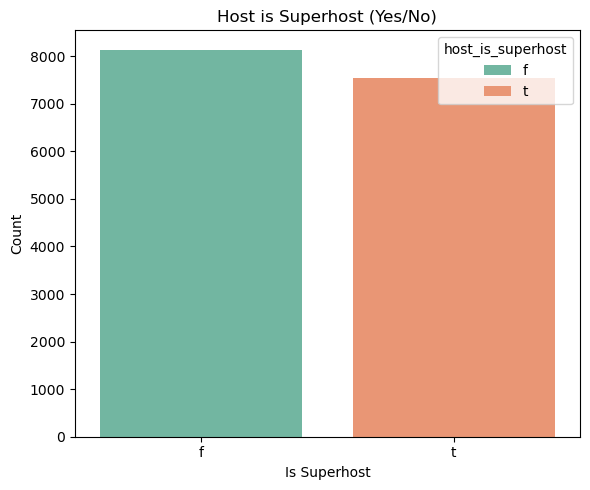

In [31]:
# Superhost Analysis
plt.figure(figsize=(6, 5))
sns.countplot(data=df_waw_listings, x='host_is_superhost', hue = 'host_is_superhost', palette='Set2')
plt.title('Host is Superhost (Yes/No)')
plt.xlabel('Is Superhost')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

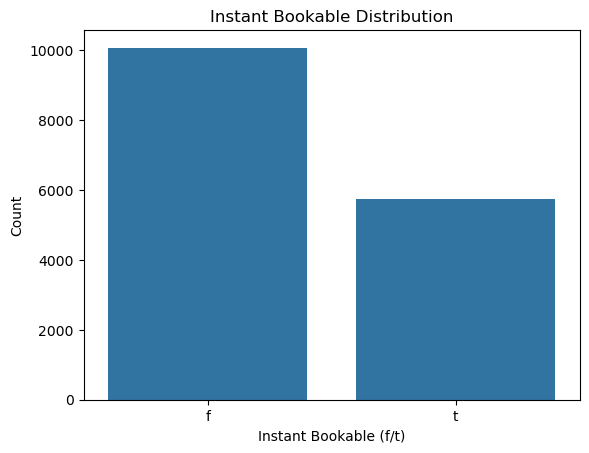

In [34]:
#Instant bookable 
sns.countplot(data=df_waw_listings, x='instant_bookable')
plt.title('Instant Bookable Distribution')
plt.xlabel('Instant Bookable (f/t)')
plt.ylabel('Count')
plt.show()

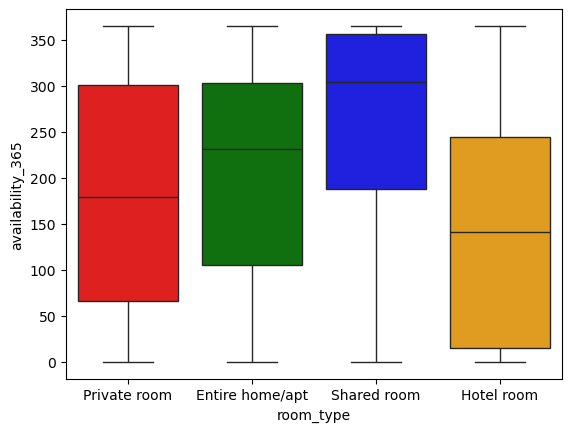

In [35]:
plt.figure()
ax = sns.boxplot(data=df_waw_listings, x='room_type', y='availability_365', hue='room_type', palette=['red', 'green', 'blue', 'orange'], legend=False)
plt.show()

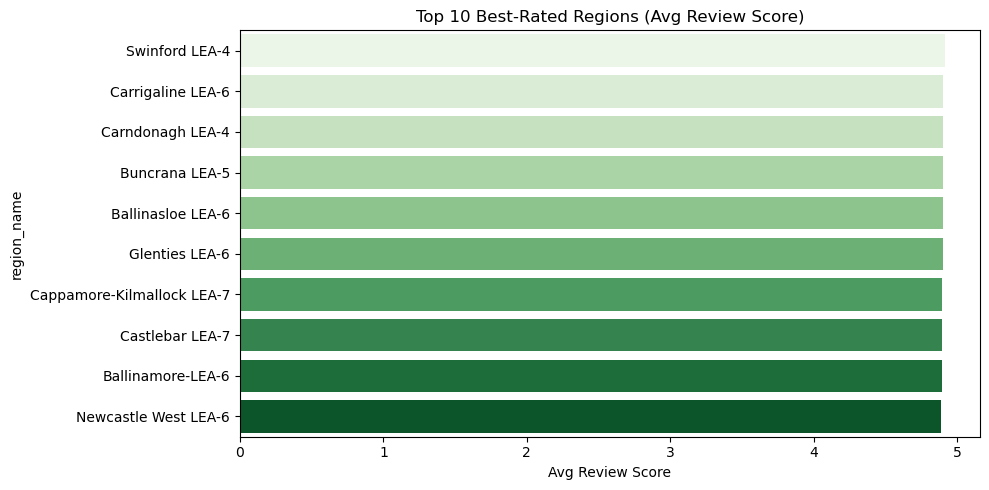

In [40]:
# Best-rated regions
top_rated = df_waw.groupby('region_name')['review_scores_rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated.values, y=top_rated.index, hue =top_rated.index , palette='Greens',legend=False)
plt.title('Top 10 Best-Rated Regions (Avg Review Score)')
plt.xlabel('Avg Review Score')
plt.tight_layout()
plt.show()

count    14592.000000
mean       164.498150
std        112.261776
min         11.000000
25%         95.000000
50%        135.000000
75%        197.000000
max       1000.000000
Name: price, dtype: float64


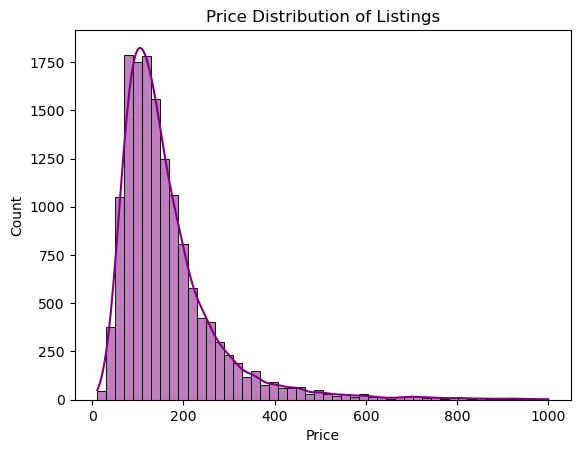

In [73]:
# Clean and analyze price column
if 'price' in df_waw.columns:
    print(df_waw['price'].describe())

    sns.histplot(df_waw['price'], bins=50, kde=True,color='purple')
    plt.title("Price Distribution of Listings")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

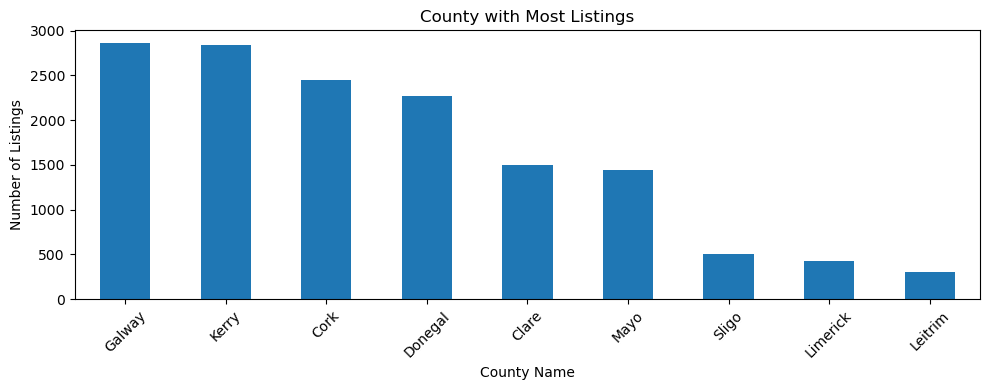

In [74]:
# Count of listings by region
listing_counts = df_waw['County'].value_counts().head(10)

# Plot
listing_counts.plot(kind='bar', figsize=(10, 4), title='County with Most Listings')
plt.xlabel("County Name")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


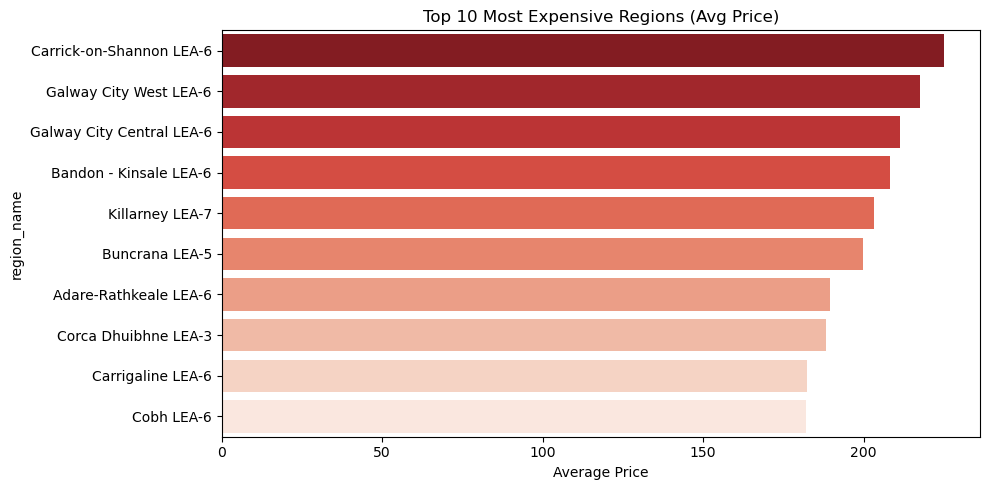

In [75]:
# Top 10 most expensive regions (by mean price)
top_expensive = df_waw.groupby('region_name')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_expensive.values, y=top_expensive.index, hue =top_expensive.index, palette='Reds_r', legend=False)
plt.title('Top 10 Most Expensive Regions (Avg Price)')
plt.xlabel('Average Price')
plt.tight_layout()
plt.show()


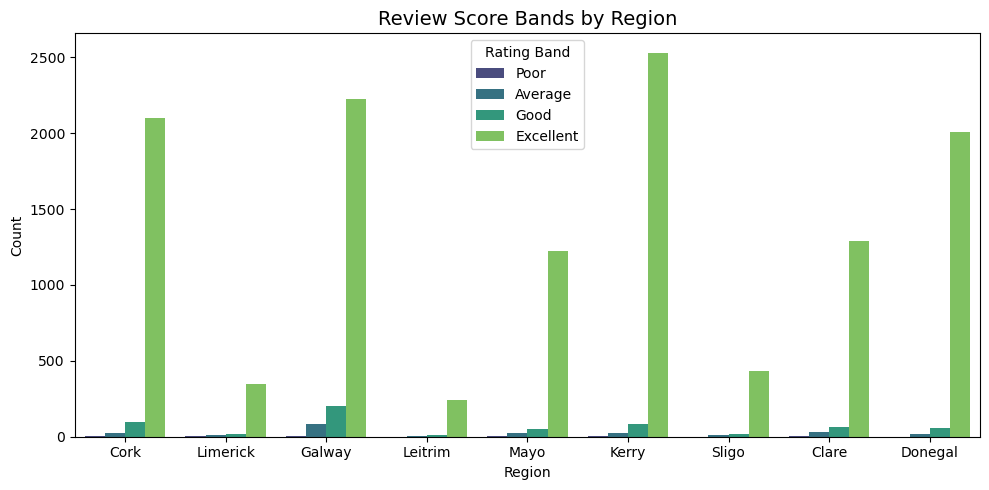

In [76]:
# Review Score Band Analysis
df_waw['rating_band'] = pd.cut(df_waw['review_scores_rating'], bins=[0, 2, 4, 4.5, 5], labels=["Poor", "Average", "Good", "Excellent"])
plt.figure(figsize=(10, 5))
sns.countplot(data=df_waw, x='County', hue='rating_band', palette="viridis")
plt.title("Review Score Bands by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title='Rating Band')
plt.tight_layout()
plt.show()